# Danish Khan
### Final Project
### DSC 530 Data Exploration and Analysis
### 11/18/2023

# Introduction

I have chosen a dataset that reflects a personal interest of mine. As someone from King County in Washington State myself, it was a pleasure going through the home sales data and identifying my childhood home, and the homes of people I've come to know over the years. The aim of this dataset is to predict the house sales in King County, Washington State, USA, based on various variables such as, number of bedrooms, home size, lot side, number of bedrooms, etc. The dataset consists of historic data of houses sold between January 2006 and December 2016. Using this dataset I wanted to understand the variables that buyers consider, and if the variables can affect the overall purchase price of the home. The following project explores the relationships between various variables, their relationships, and to what extent do they contribute to the value of a home.

# Sources

### Dataset

The dataset "Housing Data" is a compilation of data available from Kaggle and the United States Census filtered for King County. The data set is commonly available online for teaching and exploratory purposes.

### Book

Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

### Functions and Libraries

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import thinkstats2
import thinkplot
import scipy

# Data Import

In [3]:
df = pd.read_csv('Housing_Data.csv')

df.head()

,sale_date,sale_price,sale_reason,sale_instrument,sale_warning,site_type,address_full,zip_code,city_name,postal_city_name,...,total_bedrooms,bath_full_count,bath_half_count,bath_3quarter_count,year_built,year_renovated,current_zoning,square_feet_lot,property_type,present_use
0,1/3/06,698000,1,3,NaN,R1,17021 NE 113TH CT,98052,REDMOND,REDMOND,...,4,2,1,0,2003,0,R4,6635,R,2
1,1/3/06,649990,1,3,NaN,R1,11927 178TH PL NE,98052,REDMOND,REDMOND,...,4,2,0,1,2006,0,R4,5570,R,2
2,1/3/06,572500,1,3,NaN,R1,13315 174TH AVE NE,98052,NaN,REDMOND,...,4,1,1,1,1987,0,R6,8444,R,2
3,1/3/06,420000,1,3,NaN,R1,3303 178TH AVE NE,98052,REDMOND,REDMOND,...,3,1,0,1,1968,0,R4,9600,R,2
4,1/3/06,369900,1,3,15,R1,16126 NE 108TH CT,98052,REDMOND,REDMOND,...,3,1,0,1,1980,0,R6,7526,R,2


# A minimum of 5 variables in your dataset used during your analysis.

* sale_price - Dependent Variable (integer)
* building_grade - Independent Variable (integer)
* square_feet_home - Independent Variable (integer)
* total_bedrooms - Independent Variable (integer)
* bath_full_count - Independent Variable (integer)
* bath_half_count - Independent Variable (integer)
* bath_3quarter_count - Independent Variable (integer)
* square_feet_lot - Independent Variable (integer)

# Describe what the variables mean in the dataset.

* sale_price - The final price that the home sold for, in dollars.
* building_grade - The construction quality rating of a home, on a scale of 1 to 13.
* square_feet_home - The total heated living space inside of the home, in square feet.
* total_bedrooms - The total number of bedrooms inside of the home.
* bath_full_count - The total number of full (sink+toilet+shower+bathtub) bathrooms inside of the home.
* bath_half_count - The total number of half (sink+toilet) bathrooms inside of the home.
* bath_3quarter_count - The total number of three-quarter (sink+toilet+shower) bathrooms inside of the home.
* square_feet_lot - The total size of the lot the home is built upon, in square feet.

In [4]:
# small preview of the variable

df.sale_price.head()

0    698000
1    649990
2    572500
3    420000
4    369900
Name: sale_price, dtype: int64

In [5]:
# small preview of the variable

df.building_grade.head()

0    9
1    9
2    8
3    8
4    7
Name: building_grade, dtype: int64

In [6]:
# small preview of the variable

df.square_feet_home.head()

0    2810
1    2880
2    2770
3    1620
4    1440
Name: square_feet_home, dtype: int64

In [7]:
# small preview of the variable

df.total_bedrooms.head()

0    4
1    4
2    4
3    3
4    3
Name: total_bedrooms, dtype: int64

In [8]:
# small preview of the variable

df.bath_full_count.head()

0    2
1    2
2    1
3    1
4    1
Name: bath_full_count, dtype: int64

In [9]:
# small preview of the variable

df.bath_half_count.head()

0    1
1    0
2    1
3    0
4    0
Name: bath_half_count, dtype: int64

In [10]:
# small preview of the variable

df.bath_3quarter_count.head()

0    0
1    1
2    1
3    1
4    1
Name: bath_3quarter_count, dtype: int64

In [11]:
# small preview of the variable

df.square_feet_lot.head()

0    6635
1    5570
2    8444
3    9600
4    7526
Name: square_feet_lot, dtype: int64

# Include a histogram of each of the variables.

### building_grade Variable

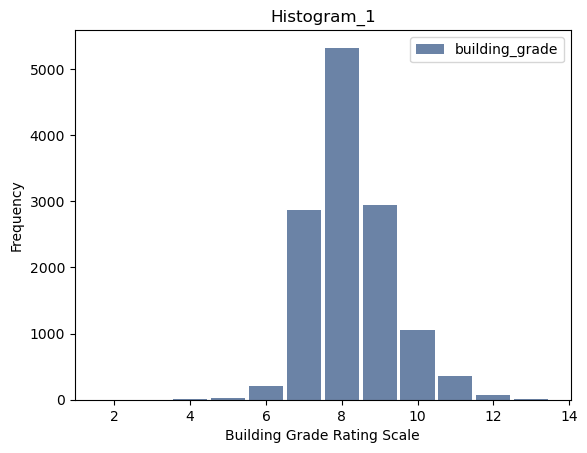

In [12]:
hist1 = thinkstats2.Hist(df.building_grade, label='building_grade')

thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Building Grade Rating Scale', ylabel='Frequency', title='Histogram_1')

### square_feet_home Variable

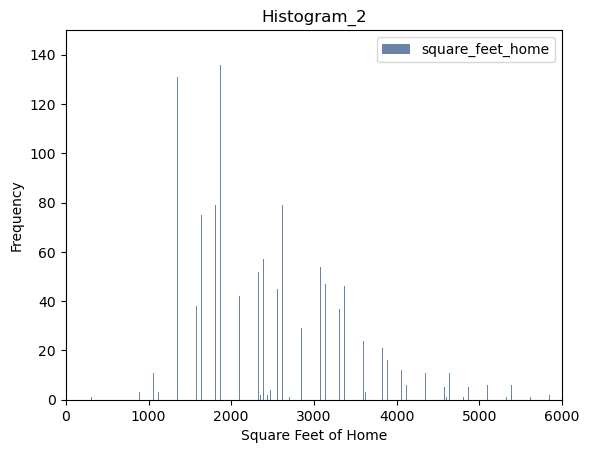

In [13]:
hist2 = thinkstats2.Hist(df.square_feet_home, label='square_feet_home')

thinkplot.Hist(hist2)
# axis scale allows for a zoomed-in look
thinkplot.Config(xlabel='Square Feet of Home', ylabel='Frequency', title='Histogram_2', axis=[0, 6000, 0, 150])

### total_bedrooms Variable

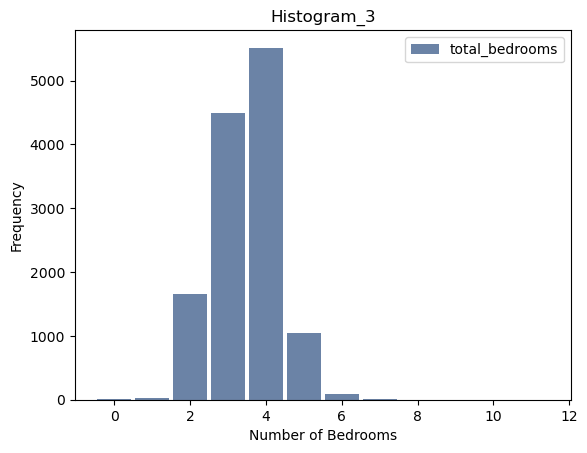

In [14]:
hist3 = thinkstats2.Hist(df.total_bedrooms, label='total_bedrooms')

thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Number of Bedrooms', ylabel='Frequency', title='Histogram_3')

### bath_full_count Variable

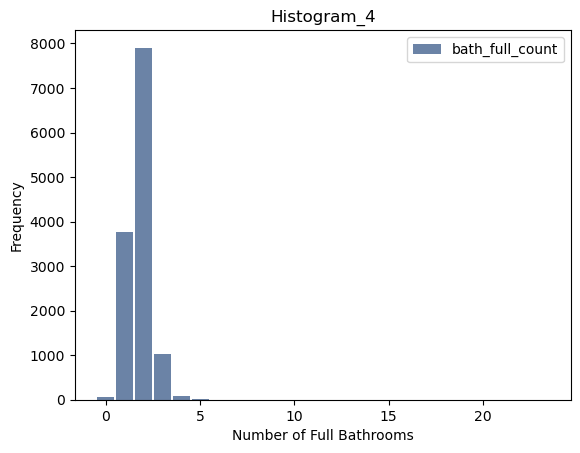

In [15]:
hist4 = thinkstats2.Hist(df.bath_full_count, label='bath_full_count')

thinkplot.Hist(hist4)
thinkplot.Config(xlabel='Number of Full Bathrooms', ylabel='Frequency', title='Histogram_4')

### bath_half_count Variable

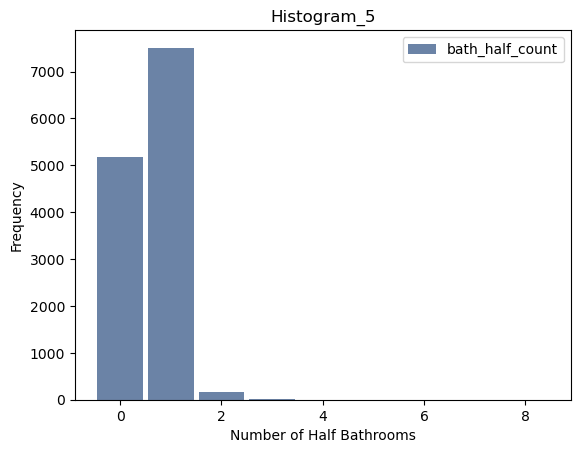

In [16]:
hist5 = thinkstats2.Hist(df.bath_half_count, label='bath_half_count')

thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Number of Half Bathrooms', ylabel='Frequency', title='Histogram_5')

### bath_3quarter_count Variable

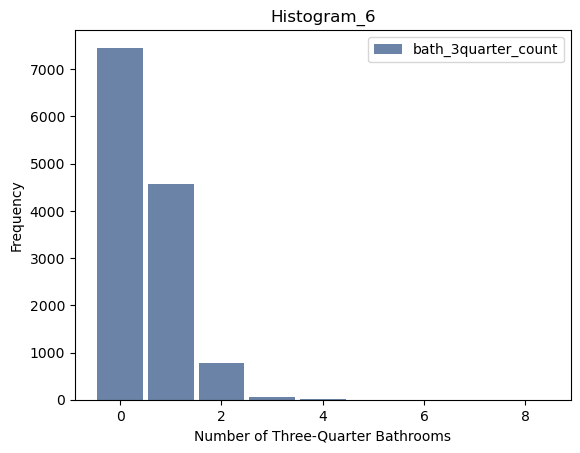

In [17]:
hist6 = thinkstats2.Hist(df.bath_3quarter_count, label='bath_3quarter_count')

thinkplot.Hist(hist6)
thinkplot.Config(xlabel='Number of Three-Quarter Bathrooms', ylabel='Frequency', title='Histogram_6')

### square_feet_lot Variable

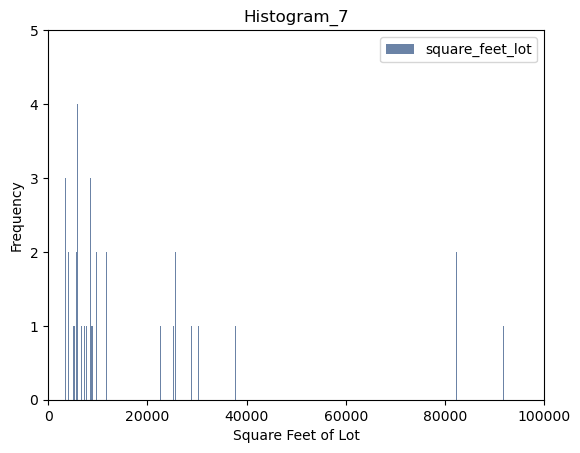

In [18]:
hist7 = thinkstats2.Hist(df.square_feet_lot, label='square_feet_lot')

thinkplot.Hist(hist7)
# axis scale allows for a zoomed-in look
thinkplot.Config(xlabel='Square Feet of Lot', ylabel='Frequency', title='Histogram_7', axis=[0, 100000, 0, 5])

# Identify any outliers, explain the reasoning for them being outliers, and how you believe they should be handled.

### square_feet_home Variable

In [19]:
# largest outliers identified and printed in square_feet_home

for item, frequency in hist2.Largest(4):
    print("SqFt_Home:", item, "Freq:", frequency)

SqFt_Home: 13540 Freq: 3
SqFt_Home: 13210 Freq: 2
SqFt_Home: 11810 Freq: 1
SqFt_Home: 10630 Freq: 1


In [20]:
# smallest outliers identified and printed in square_feet_home

for item, frequency in hist2.Smallest(6):
    print("SqFt_Home:", item, "Freq:", frequency)

SqFt_Home: 240 Freq: 1
SqFt_Home: 310 Freq: 1
SqFt_Home: 340 Freq: 1
SqFt_Home: 410 Freq: 1
SqFt_Home: 430 Freq: 1
SqFt_Home: 480 Freq: 2


The histogram scaling is thrown off due to the outliers present in this variable. After going through the data, I have identified 4 significant ouliers on the larger end of the range, and 6 minor outliers on the smaller end of the range. On the larger end of the range, likely the houses listed with such large living square footage are one-off custom homes, and not a part of the usual offerings in the suburbs. These homes should ideally not be included in any modeling, since their sales price would also be one-off and beyond the capabilities of replicating through any measurable factors. On the smaller end of the range, there are several living spaces that smaller than usual. However these should remain a part of the data set as these represent an introducion into what are likely condominiums.

### square_feet_lot Variable

In [21]:
# largest outliers identified and printed in square_feet_lot

for item, frequency in hist7.Largest(5):
    print("SqFt_Lot:", item, "Freq:", frequency)

SqFt_Lot: 1631322 Freq: 1
SqFt_Lot: 1327090 Freq: 1
SqFt_Lot: 1166246 Freq: 2
SqFt_Lot: 1127205 Freq: 2
SqFt_Lot: 1008414 Freq: 2


In [22]:
# smallest outliers identified and printed in square_feet_lot

for item, frequency in hist7.Smallest(8):
    print("SqFt_Lot:", item, "Freq:", frequency)

SqFt_Lot: 785 Freq: 1
SqFt_Lot: 829 Freq: 1
SqFt_Lot: 835 Freq: 1
SqFt_Lot: 921 Freq: 1
SqFt_Lot: 952 Freq: 2
SqFt_Lot: 975 Freq: 1
SqFt_Lot: 977 Freq: 1
SqFt_Lot: 982 Freq: 1


The histogram scaling is significantly thrown off due to the outliers present in this variable, further exascerbating the range of the dataset. After going through the data, I have identified 4 significant ouliers on the larger end of the range, and 6 minor outliers on the smaller end of the range. On the larger end of the range, likely the lot sizes listed with such large land square footage are scattered farming ranges, or protected private land. These lots should ideally not be included in any modeling, since at that point buyers are paying for the land and farming assets rather than any house itself located on the plot. On the smaller end of the range, there are small reasonably smaller lots, but nothing that stands out and unrealistically small. These lots are likely for lots artifically split, or lots for vertical townhomes

### bath_full_count Variable

In [23]:
# largest outlier identified and printed in bath_full_count

for item, frequency in hist4.Largest(1):
    print("Full_Bath:", item, "Freq:", frequency)

Full_Bath: 23 Freq: 1


After going through the data, I have identified 1 significant oulier on the larger end of the range. This datapoint suggests that there is a home with 23 total full-sized bathrooms. This is likely due to the house being a commercial unit, posing as an air-bnb or a hotel of some sort. This data point should ideally not be included in any modeling, since the outlier is far beyond the remaining range for the variable in the dataset.

# Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails.

### building_grade Variable

In [24]:
print("Mean:", df.building_grade.mean())
print("Mode:", df.building_grade.mode())
print("Spread:", df.building_grade.var())
print("Tail:", scipy.stats.skew(df.building_grade))
print("Tail Length:", scipy.stats.kurtosis(df.building_grade))

Mean: 8.24041974349009
Mode: 0    8
Name: building_grade, dtype: int64
Spread: 1.1938263163390286
Tail: 0.6023871771071538
Tail Length: 1.15999927187716


The average grade is 8.24.
The mode grade is 8.
The spread of grade distribution is 1.19.
The distribution tail is positively skewed to the right.

### square_feet_home Variable

In [25]:
print("Mean:", df.square_feet_home.mean())
print("Mode:", df.square_feet_home.mode())
print("Spread:", df.square_feet_home.var())
print("Tail:", scipy.stats.skew(df.square_feet_home))
print("Tail Length:", scipy.stats.kurtosis(df.square_feet_home))

Mean: 2539.5061795569372
Mode: 0    1510
Name: square_feet_home, dtype: int64
Spread: 979738.8053295113
Tail: 1.613514790524295
Tail Length: 8.587936458598204


The average home sq ft is 239.51.
The mode home sq ft is 1510.
The spread of home sq ft distribution is 979738.81.
The distribution tail is positively skewed to the right.

### total_bedrooms Variable

In [26]:
print("Mean:", df.total_bedrooms.mean())
print("Mode:", df.total_bedrooms.mode())
print("Spread:", df.total_bedrooms.var())
print("Tail:", scipy.stats.skew(df.total_bedrooms))
print("Tail Length:", scipy.stats.kurtosis(df.total_bedrooms))

Mean: 3.478663039253789
Mode: 0    4
Name: total_bedrooms, dtype: int64
Spread: 0.7675989586656375
Tail: 0.040177211406595414
Tail Length: 1.0842873744571362


The average total bedroom is 3.48.
The mode total bedroom is 4.
The spread of total bedroom distribution is 0.77.
The distribution tail is positively skewed to the right.

### bath_full_count Variable

In [27]:
print("Mean:", df.bath_full_count.mean())
print("Mode:", df.bath_full_count.mode())
print("Spread:", df.bath_full_count.var())
print("Tail:", scipy.stats.skew(df.bath_full_count))
print("Tail Length:", scipy.stats.kurtosis(df.bath_full_count))

Mean: 1.7984453944811505
Mode: 0    2
Name: bath_full_count, dtype: int64
Spread: 0.4235361402276994
Tail: 3.0400053724372182
Tail Length: 88.33034341075107


The average full bath count is 1.80.
The mode full bath count is 2.
The spread of full bath count distribution is 0.42.
The distribution tail is positively skewed to the right.

### bath_half_count Variable

In [28]:
print("Mean:", df.bath_half_count.mean())
print("Mode:", df.bath_half_count.mode())
print("Spread:", df.bath_half_count.var())
print("Tail:", scipy.stats.skew(df.bath_half_count))
print("Tail Length:", scipy.stats.kurtosis(df.bath_half_count))

Mean: 0.6133696074621064
Mode: 0    1
Name: bath_half_count, dtype: int64
Spread: 0.2769667620892121
Tail: 0.2965900447747792
Tail Length: 3.68370297001056


The average half bath count is 0.61.
The mode half bath count is 1.
The spread of half bath count distribution is 0.28.
The distribution tail is positively skewed to the right.

### bath_3quarter_count Variable

In [29]:
print("Mean:", df.bath_3quarter_count.mean())
print("Mode:", df.bath_3quarter_count.mode())
print("Spread:", df.bath_3quarter_count.var())
print("Tail:", scipy.stats.skew(df.bath_3quarter_count))
print("Tail Length:", scipy.stats.kurtosis(df.bath_3quarter_count))

Mean: 0.4939759036144578
Mode: 0    0
Name: bath_3quarter_count, dtype: int64
Spread: 0.42255776838698667
Tail: 1.4674021592340147
Tail Length: 5.557214530264989


The average 3quarter bath count is 0.49.
The mode 3quarter bath count is 0.
The spread of 3quarter bath count distribution is 0.42.
The distribution tail is positively skewed to the right.

### square_feet_lot Variable

In [30]:
print("Mean:", df.square_feet_lot.mean())
print("Mode:", df.square_feet_lot.mode())
print("Spread:", df.square_feet_lot.var())
print("Tail:", scipy.stats.skew(df.square_feet_lot))
print("Tail Length:", scipy.stats.kurtosis(df.square_feet_lot))

Mean: 22228.568208317138
Mode: 0    8400
Name: square_feet_lot, dtype: int64
Spread: 3241399674.84132
Tail: 10.375005732113362
Tail Length: 173.88078963417743


The average lot sq ft is 22228.57.
The mode lot sq ft is 8400.
The spread of lot sq ft distribution is 3241399674.84.
The distribution tail is positively skewed to the right.

# Plot and compare three scenarios in your data using a PMF.

### bath_full_count + bath_half_count + bath_3quarter_count Variables

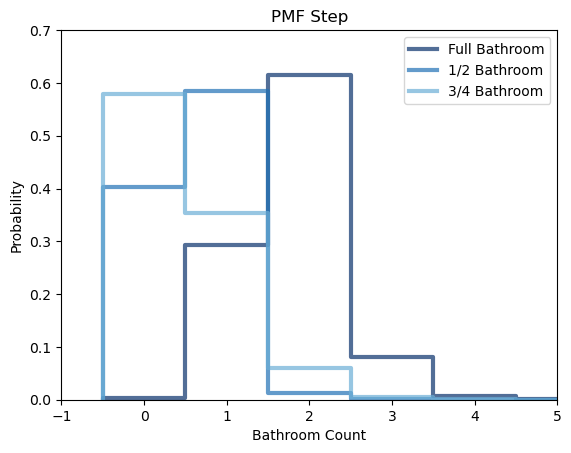

In [31]:
# assigning 3 variables to a PMF and combining all three into a single graph as visual steps

full_pmf = thinkstats2.Pmf(df.bath_full_count, label='Full Bathroom')
half_pmf = thinkstats2.Pmf(df.bath_half_count, label='1/2 Bathroom')
three_quarter_pmf = thinkstats2.Pmf(df.bath_3quarter_count, label='3/4 Bathroom')

thinkplot.PrePlot(3)
thinkplot.Pmfs([full_pmf, half_pmf, three_quarter_pmf])
thinkplot.Config(xlabel='Bathroom Count', ylabel='Probability', title='PMF Step', axis=[-1, 5, 0, 0.7])

I wanted to take a look at overall  bathrooms in a house (any size), but filtered in by probability through a pmf, by bathroom size (full, 1/2, 3/4). I wanted to understand: what is the probability in any selected house of there being a full bathroom and how many, what is the probability in any selected house of there being a 1/2 bathroom and how many, and what is the probability in any selected house of there being a 3/4 bathroom and how many. According to the PMF graph, the lower the number of bathrooms in a home the higher the probability there are more 3/4 bathrooms. The higher the number of bathrooms in a home, the higher the probability there are more full bathrooms. And the probability for 1/2 bathroom is somewhere in the middle of those two extremes.

# Create and plot a CDF with one of your variables. What does this tell you about your variable and how does it address the question you are trying to answer?

### building_grade Variable

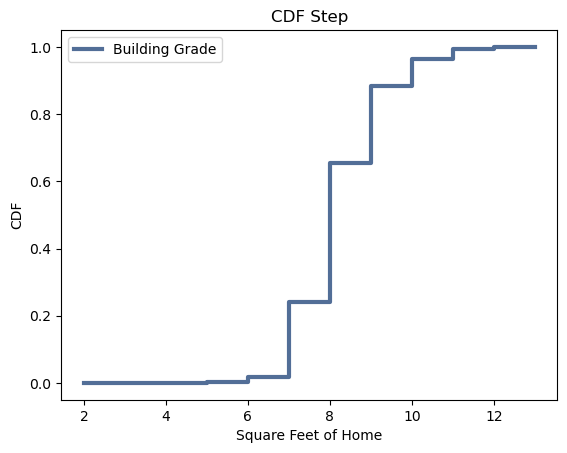

In [32]:
# assigning a variable to a CDF and graphing it visually as steps

building_grade_cdf = thinkstats2.Cdf(df.building_grade, label='Building Grade')

thinkplot.Cdf(building_grade_cdf)
thinkplot.Config(xlabel='Square Feet of Home', ylabel='CDF', title='CDF Step')

According to the CDF graph, I can interpret a couple of helpful details about the variable: building_grade. To reiterate, building grade is the construction quality rating of a home on a scale of 1 to 13. Anything 6 or less is considered not up to code, and anything higher than 10 are custom builds. It looks like about 10% of homes are rated less than grade 7, and 90% of homes are rated less than grade 10. This translated to qualitative details according to the grade scale. In other words, 10% of homes hardly meet building construction code, and 90% of homes are not custom builds. A majority of the homes fall within grades 7-10, the most common grades fall within 7-9 with a mode at grade 8. This is important in addressing the question because this graph represents an identifiable distribution of home construction quality. An identifyable pattern demonstrates that this variable likely influences the overall purchase price of a home, and provides a good idea on the distribution of quality of build across the range.

# Plot an analytical distribution and provide your analysis on how it applies to the dataset you have chosen.

### square_feet_home Variable Normal Probability Plot

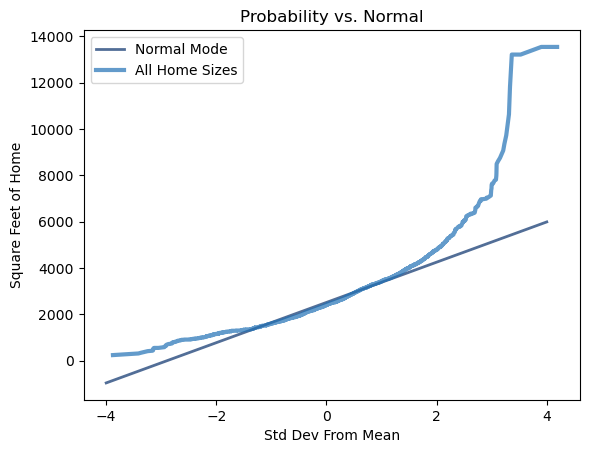

In [33]:
# assigning variables to the normal and probability parameters

sqft_home = df.square_feet_home
mean, var = thinkstats2.TrimmedMeanVar(sqft_home, p=0.01)
std = np.sqrt(var)
xs = [-4, 4]

# graphing the normal mode line and home size probability line

fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=2, label="Normal Mode")
xs, ys = thinkstats2.NormalProbability(sqft_home)
thinkplot.Plot(xs, ys, label="All Home Sizes")
thinkplot.Config(xlabel="Std Dev From Mean", ylabel="Square Feet of Home", title='Probability vs. Normal')

A normal probability plot is a visual test for normality, and good way to compare data against a straight normal distribution. In this normal probability plot I observe deviations on both the left and the right tail, both of which start to diverge from the normal mode line approximately 2 standard deviations in either direction from the mean. This behavior shows that home are larger than expected in 2 scenarios: they're larger than expected on the smaller square feet end and they're still larger than expected on the larger square feet end, but by a much larger margin. This is helpful with predictive analysis, as the actual size of the house is always either as expected through predictive analysis or larger than expected through predicitve analysis.

# Create two scatter plots comparing two variables each, and provide your analysis on correlation and causation.

In [34]:
# defining covariance and Pearson's correlation function using the book as a source

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def PCorr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    pcorr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return pcorr

###  square_feet_home Variable vs. square_feet_lot Variable

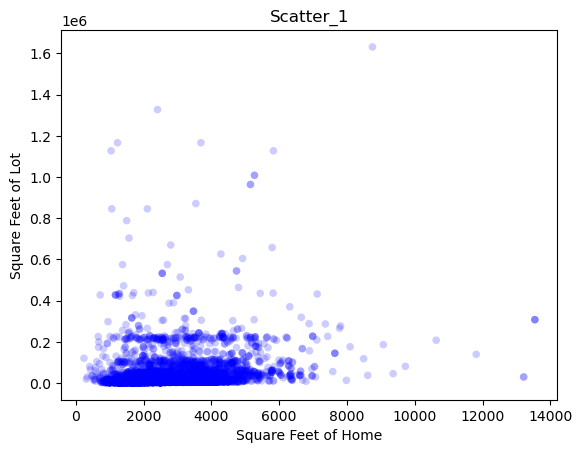

In [35]:
# defining two variables and creating a scatter plot

sqft_home = df.square_feet_home
sqft_lot = df.square_feet_lot

thinkplot.Scatter(sqft_home, sqft_lot, alpha=0.2)
thinkplot.Config(xlabel="Square Feet of Home", ylabel="Square Feet of Lot", title='Scatter_1')

In [36]:
# calculating Person's correlation and covariance

print("P-Correlation:", PCorr(sqft_home, sqft_lot))
print("Covariance:", Cov(sqft_home, sqft_lot))

P-Correlation: 0.2341045027798383
Covariance: 13191599.419807808


I wanted to understand if a larger lot of land relates to a larger home size, or if there is any hint of such a relationship between the two independent variables. The two variables return a Pearson's correlation value of 0.23. The coefficient is positive, indicating a positive correlation between the two variables, suggesting that as one variable changes the other variable changes in the same direction. But because the coefficent value is between 0 and 0.3 the relationship between the two variables can be considered to have weak correlation. The two variables also return a covariance coefficient of 13191599.42. The coefficient is extremely high, making it seem almost arbitrary. But what's important here is that the sign of the value is positive, indicating that both variables vary in the same direction similar to that of a direct or non-inverse relationship. Additionally, a linear relationship may be observed in the scatterplot, but is not obvious. For this understand the Pearson's correlation coefficient is more important. Pearson's correlation only measures linear relationships, and the coefficient value is noticeably greater than zero. Therefore I can conclude that there likely is a linear relationship between the two variable. This by default negates the acceptance of a non-linear relationship, proving that the two variables do in fact maintain a positive linear relationship.

### total_bedrooms Variable vs. bath_full_count Variable

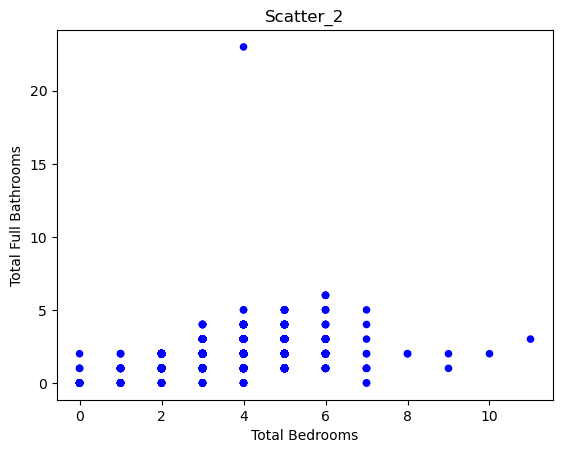

In [37]:
# defining two variables and creating a scatter plot

tot_bed = df.total_bedrooms
bath_full = df.bath_full_count

thinkplot.Scatter(tot_bed, bath_full, alpha=1)
# outlier is visible that was mentioned in an earlier section
thinkplot.Config(xlabel="Total Bedrooms", ylabel="Total Full Bathrooms", title='Scatter_2')

In [38]:
# calculating Person's correlation and covariance

print("P-Correlation:", PCorr(tot_bed, bath_full))
print("Covariance:", Cov(tot_bed, bath_full))

P-Correlation: 0.3045989435012622
Covariance: 0.1736629040641335


I wanted to understand if an increase of number of total bedrooms also means an increase in the number of total full-sized bathrooms, or if there is any hint of such a relationship between the two independent variables. The two variables return a Pearson's correlation value of 0.30. The coefficient is positive, indicating a positive correlation between the two variables, suggesting that as one variable changes the other variable changes in the same direction. But because the coefficent value is between 0.3 and 0.5 the relationship between the two variables can be considered to have moderate correlation. The two variables also return a covariance coefficient of 0.174. The coefficient return a low value but the the sign of the value is positive, indicating that both variables vary in the same direction similar to that of a direct or non-inverse relationship. Additionally, a linear relationship can be observed in the scatterplot. Pearson's correlation only measures linear relationships, and the coefficient value is far enough from zero to conclude that there is a linear relationship between the two variable. This by default negates the acceptance of a non-linear relationship, proving that the two variables do in fact maintain a positive linear relationship.

# Conduct a test on your hypothesis using the Tested Correlation Method.

### square_feet_lot Variable vs. square_feet_home Variable

In [39]:
# defining a hypothesis testing class and its iteration functions using the book as a source

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

# defining a correlation test class and its comparative functions using the book as a source

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [40]:
# running the tested correlation medthod

data =  df.square_feet_home, df.square_feet_lot
ht = CorrelationPermute(data)
pvalue = ht.PValue()

print("P-Value:", pvalue)
print("Actual P-Correlation:", ht.actual)
print("Largest Simulated:", ht.MaxTestStat())

P-Value: 0.0
Actual P-Correlation: 0.2341045027798383
Largest Simulated: 0.032051934972579195


According to what was observed in the scatterplot of square_feet_home variable vs. square_feet_lot variable, there appears to be an observed linear correlation. To understand if this observation is statistically significant, I ran a permutation test between the two. The subsequent output p-value is 0.0, which means that in 1000 trials a correlation was not observed that exceeded the observed correlation under the null hypothesis. That means that the p-value is likely very small and close to 0, but it is not actually 0. And to get a sense of how unexpected the observed value is under the null hypothesis, I compared the actual correlation to the largest correlation value observed in the hypothesis testing simulation.

# Conduct a regression analysis on one dependent and multiple independent variables.

### Variables

Dependent Variable (integer)
* sale_price

Independent Variables (integer)
* building_grade
* square_feet_home
* total_bedrooms
* bath_full_count
* bath_half_count
* bath_3quarter_count
* square_feet_lot

In [41]:
# fitting a multiple regression model to see how all variables may predict price of a house

formula = 'sale_price ~ building_grade + square_feet_home + total_bedrooms + bath_full_count + bath_half_count + bath_3quarter_count + square_feet_lot'
results = smf.ols(formula, data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     508.9
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:20:51   Log-Likelihood:            -1.8277e+05
No. Observations:               12865   AIC:                         3.656e+05
Df Residuals:                   12857   BIC:                         3.656e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.133e+04   3.17e+04     -0.988      0.323   -9.35e+04    3.08e+04
building_grade       3.733e+04   4441.097      8.405      0.000    2.86e+04     4.6e+04
square_feet_home      151.0935      6.487     23.291      0.000     138.377     163.810
total_bedrooms      -1.645e+04   4598.343     -3.576      0.000   -2.55e+04   -7432.537
bath_full_count      3.048e+04   7262.665      4.197      0.000    1.62e+04    4.47e+04
bath_half_count      7802.5100   7156.473      1.090      0.276   -6225.240    2.18e+04
bath_3quarter_count -9373.0748   6978.754     -1.343      0.179   -2.31e+04    4306.320
square_feet_lot         0.1357      0.058      2.344      0.019       0.022       0.249
==============================================================================
Omnibus:                    14376.566   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1246758.306
Skew:                           5.841   Prob(JB):                         0.00
Kurtosis:                      49.791   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# extracting the intercept and then the slope of each independent variable

print("Intercept:", results.params['Intercept'])
print("building_grade:", results.params['building_grade'])
print("square_feet_home:", results.params['square_feet_home'])
print("total_bedrooms:", results.params['total_bedrooms'])
print("bath_full_count:", results.params['bath_full_count'])
print("bath_half_count:", results.params['bath_half_count'])
print("bath_3quarter_count:", results.params['bath_3quarter_count'])
print("square_feet_lot:", results.params['square_feet_lot'])

Intercept: -31332.994727192585
building_grade: 37326.61748274828
square_feet_home: 151.0934669571378
total_bedrooms: -16445.97262431466
bath_full_count: 30481.57201216422
bath_half_count: 7802.509989992648
bath_3quarter_count: -9373.074826225966
square_feet_lot: 0.1356704834311536


In [43]:
# extracting the p-value of each independent variable

print("building_grade:", results.pvalues['building_grade'])
print("square_feet_home:", results.pvalues['square_feet_home'])
print("total_bedrooms:", results.pvalues['total_bedrooms'])
print("bath_full_count:", results.pvalues['bath_full_count'])
print("bath_half_count:", results.pvalues['bath_half_count'])
print("bath_3quarter_count:", results.pvalues['bath_3quarter_count'])
print("square_feet_lot:", results.pvalues['square_feet_lot'])

building_grade: 4.733057748676527e-17
square_feet_home: 1.4745508776943683e-117
total_bedrooms: 0.00034950451619367384
bath_full_count: 2.722644271987373e-05
bath_half_count: 0.27561331195083527
bath_3quarter_count: 0.17926746830708923
square_feet_lot: 0.019117648206851703


In [44]:
# extracting the R-square value

print("R-square:", results.rsquared)

R-square: 0.21695436113715139


Out of all the tested variables, a handful of them as significant according to the p-values extracted. The variables building_grade, square_feet_home, total_bedrooms, bath_full_count, and square_feet_lot are all statstically significant. These are unlikely to occur by chance and are relevent to suggesting the multiple regression model above. Over all, the R-square value indicates somewhat of a fit, providing a value of 0.217. The R-square value is still lower than ideal in this model, but also indiciates that all variables together account for less variation compared to on their own. The above model forces a linear relationship, and the contributions of the independent variables may be non-linear to account for some of variances explained through the results summary.

# Summary

### Statistical/Hypothetical Question

The statistical question is which variables or attributes of a home can be used to best predict the value or sale price of a home? I used the dataset full of house sales in King County, Washington State, USA, from January 2006 to December 2016. Included are various variables such as, number of bedrooms, home size, lot side, number of bedrooms, etc. Understanding the relationships between various variables, their relationships, and to what extent do they contribute to the value of a home enabled me to explore an answer to my statistical question.

### Outcome of your exploratory data analysis.

Through my exploratory data analysis via the selected dataset, I was able to answer my statistical question. That yes there are aspect variables of a home that can be used to understand or predict the value or sale price of a home. Out of testing seven independent variables, five of those variables were significant contributors to the multiple regression model, according to their intercept R-squared values. The significant contributor variables according to the dataset are building grade, size of the home, size of the lot, total number of bedrooms, and total number of bathrooms. According to correlation tests, many of these variables increase or decrease in the same direction, which does make sense. Naturally a larger lot allows for a larger home to be built, and more bedrooms present generally require more bathrooms as well.

### What do you feel was missed during the analysis?

I feel that thoroughly cleaning and filtering the data was missed during the analysis. I used the dataset as is for the most part, only fixing obvious misspellings and incorrectly formatted cells in excel. Preparing the dataset by eliminating the outliers and finding additional researched data to differential between condominium and home sales would make the analysis more accurate. Furthermore, filtering analysis by postal_city_name would also help answer the question of how much difference does a home's location make to its value. Overall, cleaning the dataset and breaking up the dataset by location filters would have added additional credibility to the analysis.

### Were there any variables you felt could have helped in the analysis?

In real estate, the single largest variable in defining property value is location. I feel that understanding and utilizing the postal_city_name variable would've been helpful, as housing values vary greatly from city to city. This can be troublesome since the variables are characters and not integers. The dataset also includes longitude and latitude coordinates, which are integers. These can ideally be utilized instead through an online geographic API to establish location boundaries and analyze the variable that way.

### Were there any assumptions made you felt were incorrect?

I felt that assuming all items in the dataset are standalone homes was incorrect. Usually with housing data, condominiums and homes can be considered the same as both are properties that can be owned, however; the pricing scales of condominiums and homes are different even if they're similar in living conditions. I believe this may have made the dataset a little noisier and more unfiltered. This also let to some odd outliers that I had mentioned earlier on, where variables like square_feet_home and square_feet_lot were far too small for an actual home to be built around.

### What challenges did you face, what did you not fully understand?

The biggest challenge I faced was fitting the multiple regression model. I had mentioned that the function defaults to fitting a linear model, which is usually incorrect especially when including as many independent variables as I did. My R-squared value was still surprising at over 0.2, so I believe that finding a way to accurately fit a multiple polynomial regression model would only increase the R-squared value.